In [9]:
from statistics import mean, median, mode
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd

In [8]:

def plot_box_auto(data,title):
    print(data)
    # Calculate statistics
    mean = np.mean(data)
    median = np.median(data)
    variance = np.var(data)
    minimum = np.min(data)
    maximum = np.max(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    counts = Counter(data)
    # Find the number(s) with the highest frequency
    max_count = max(counts.values())
    modes = [num for num, count in counts.items() if count == max_count]
    print(f"mode {modes}")
    # Plot box plot
    plt.boxplot(data)
    plt.title('Box Plot '+title)
    plt.ylabel('Values')

    # Display statistics
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Variance: {variance:.2f}")
    print(f"Minimum: {minimum:.2f}")
    print(f"Maximum: {maximum:.2f}")
    print(f"IQR: {iqr:.2f}")

    plt.show()
    return q1,q3,median,mean,maximum,minimum,variance,iqr,modes

In [10]:
def find_outliers(data,iqr,q1,q3):

    # Calculate lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Find outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]

    return outliers


In [21]:


def create_table(median,mean,maximum,minimum,mode,outliers):
    df = pd.DataFrame({
        'Outlier': [None],
        'Median': [None],
        'Mode': [None],
        'Mean': [None],
        'Max': [None],
        'Min': [None],
        'Range': [None],
        'Type': [None],
        'Name': [None]
    })
    names=['Rating','Reviews','Size','Installs','Price']

    for i in range(0,5):
        df.at[i, 'Median'] = median[i]
        df.at[i, 'Mode'] = mode[i]
        df.at[i, 'Outlier'] = ', '.join(map(str, outliers[i]))
        df.at[i, 'Mean'] = mean[i]
        # print(f"max {max}")
        df.at[i, 'Max'] = maximum[i]
        df.at[i, 'Min'] = minimum[i]
        df.at[i, 'Type'] = type(minimum[i])
        df.at[i, 'Range'] = maximum[i]-minimum[i]
        df.at[i, 'Name'] = names[i]
    return df

10840
[4.1 3.9 4.7 ... 5.  4.5 4.5]
mode [4.4]
Mean: 4.19
Median: 4.30
Variance: 0.27
Minimum: 1.00
Maximum: 5.00
IQR: 0.50


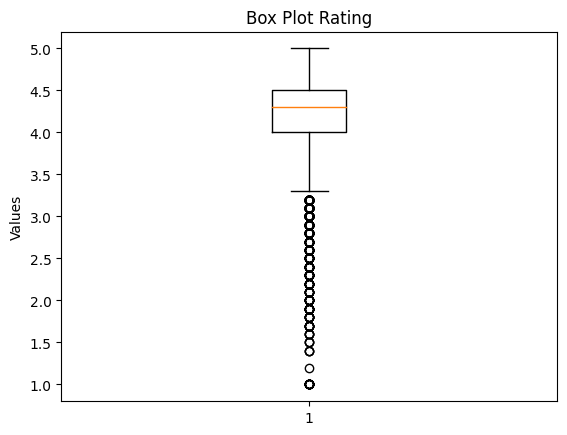

[   159    967  87510 ...      3    114 398307]
mode [0]
Mean: 444152.90
Median: 2094.00
Variance: 8570991398853.74
Minimum: 0.00
Maximum: 78158306.00
IQR: 54737.50


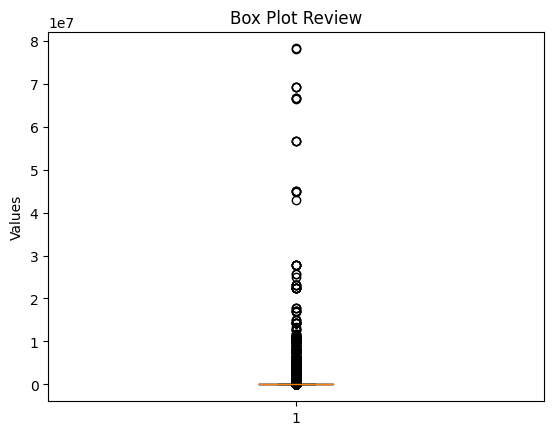

[   10000   500000  5000000 ...     1000     1000 10000000]
mode [1000000]
Mean: 15464338.88
Median: 100000.00
Variance: 7229325325860832.00
Minimum: 0.00
Maximum: 1000000000.00
IQR: 4999000.00


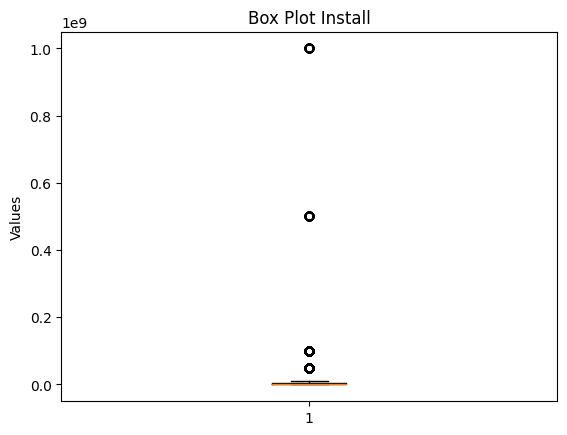

[0. 0. 0. ... 0. 0. 0.]
mode [0.0]
Mean: 1.03
Median: 0.00
Variance: 254.37
Minimum: 0.00
Maximum: 400.00
IQR: 0.00


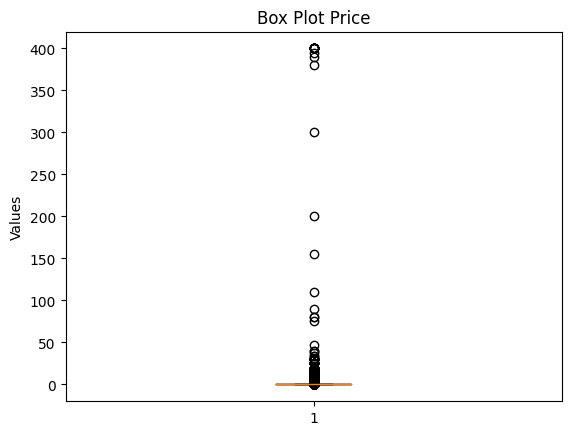

[19.  14.   8.7 ...  3.6  9.5 19. ]
mode [11.0]
Mean: 37.04
Median: 15.00
Variance: 9774.95
Minimum: 1.00
Maximum: 1020.00
IQR: 28.40


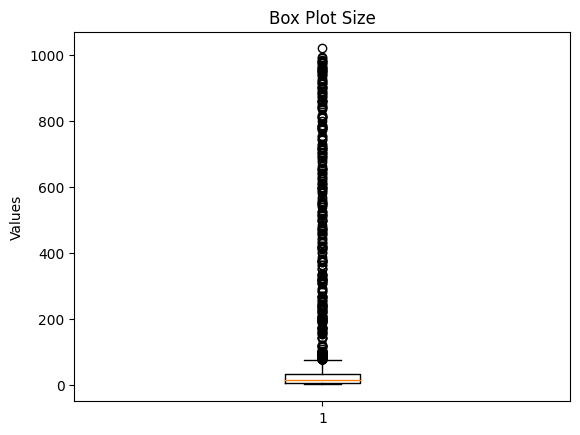

,Outlier,Median,Mode,Mean,Max,Min,Range,Type,Name
0,"3.2, 3.2, 3.1, 3.2, 3.2, 2.6, 3.1, 3.0, 1.9, 2...",4.3,<function mode at 0x7c24ea13b2e0>,4.191757,5.0,1.0,4.0,<class 'numpy.float64'>,Rating
1,"215644, 194216, 224399, 295221, 174531, 271920...",2094.0,<function mode at 0x7c24ea13b2e0>,444152.896033,78158306,0,78158306,<class 'numpy.int64'>,Reviews
2,"50000000, 100000000, 100000000, 1000000000, 50...",100000.0,<function mode at 0x7c24ea13b2e0>,15464338.882565,1000000000,0,1000000000,<class 'numpy.int64'>,Size
3,"4.99, 4.99, 4.99, 4.99, 3.99, 3.99, 6.99, 1.49...",0.0,<function mode at 0x7c24ea13b2e0>,1.027368,400.0,0.0,400.0,<class 'numpy.float64'>,Installs
4,"201.0, 79.0, 118.0, 695.0, 77.0, 77.0, 84.0, 9...",15.0,<function mode at 0x7c24ea13b2e0>,37.03544,1020.0,1.0,1019.0,<class 'numpy.float64'>,Price


In [27]:
import csv

# Path to your CSV file
csv_file_path = "/content/GooglePlay.csv"
rating_list = []
review_list = []
install_list = []
price_list = []
size_list = []
median_list = []
mode_list = []
mean_list = []
max_list = []
min_list = []
outlier_list = []
# Open the CSV file
with open(csv_file_path, newline='', encoding='utf-8') as file:
    csv_reader = csv.reader(file)

    # Iterate over each row in the CSV file
    i=0

    next(csv_reader)
    rows = list(csv_reader)
    print(len(rows))
    for i in range(0,len(rows)):
      # print(f"row {i}")
       j=0
       for j in range(len(rows[i])):
           number_str = rows[i][j]
           #print(f"clo {j}")
           if j==3 :#Rating field
            if number_str != "" :
              # print(number_str)
               field = float(number_str)
               #print(field)
              # print(type(field))
               rating_list.append(field)

           if j==4 : #Reviews
               #print(number_str)
               field = int(number_str)
               #print(field)
               #print(type(field))
               review_list.append(field)
           if j==5 : #size
              if number_str != "Varies with device" :
                # print(number_str)
                 cleaned_number_str = number_str.replace("M", "").replace("K", "").replace("k", "")

                 field = float(cleaned_number_str)
                # print(field)
                 #print(type(field))
                 size_list.append(field)

           if j==6 : #Install
              # print(number_str)
               cleaned_number_str = number_str.replace(",", "").replace("+", "")
               field = int(cleaned_number_str)
              # print(field)
               #print(type(field))
               install_list.append(field)

           if j==8 : #Price
             #  print(number_str)
               cleaned_number_str = number_str.replace("$", "")
               field = float(cleaned_number_str)
              # print(field)
             #  print(type(field))
               price_list.append(field)

q1,q3,median,mean,maximum,minimum,variance,iqr,modes=plot_box_auto(np.array(rating_list),"Rating")
outlier = find_outliers(rating_list,iqr,q1,q3)
median_list.append(median)
mode_list.append(mode)
mean_list.append(mean)
max_list.append(maximum)
min_list.append(minimum)
outlier_list.append(outlier)
q1,q3,median,mean,maximum,minimum,variance,iqr,modes=plot_box_auto(np.array(review_list),"Review")
outlier = find_outliers(review_list,iqr,q1,q3)
median_list.append(median)
mode_list.append(mode)
mean_list.append(mean)
max_list.append(maximum)
min_list.append(minimum)
outlier_list.append(outlier)
q1,q3,median,mean,maximum,minimum,variance,iqr,modes=plot_box_auto(np.array(install_list),"Install")
outlier = find_outliers(install_list,iqr,q1,q3)
median_list.append(median)
mode_list.append(mode)
mean_list.append(mean)
max_list.append(maximum)
min_list.append(minimum)
outlier_list.append(outlier)
q1,q3,median,mean,maximum,minimum,variance,iqr,modes=plot_box_auto(np.array(price_list),"Price")
outlier = find_outliers(price_list,iqr,q1,q3)
median_list.append(median)
mode_list.append(mode)
mean_list.append(mean)
max_list.append(maximum)
min_list.append(minimum)
outlier_list.append(outlier)
q1,q3,median,mean,maximum,minimum,variance,iqr,modes=plot_box_auto(np.array(size_list),"Size")
outlier = find_outliers(size_list,iqr,q1,q3)
median_list.append(median)
mode_list.append(mode)
mean_list.append(mean)
max_list.append(maximum)
min_list.append(minimum)
outlier_list.append(outlier)

create_table(median_list,mean_list,max_list,min_list,mode_list,outlier_list)

In [ ]:
import csv
import numpy as np
# Path to your CSV file
csv_file_path = "/content/sample_data/GooglePlay.csv"

# Open the CSV file
with open(csv_file_path, newline='', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    rows = list(csv_reader)
    nrows = np.array(rows)
    print(nrows[760:764,11])
    print(nrows[760:764,0])
    # print("Sum of the column:",  np.sum(nrows[0:3,0]))

['25-Dec-17' '25-Dec-17' '25-Dec-17' '4-Aug-18']
['760' '761' '762' '763']
